In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final.csv to final.csv


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
data=pd.read_csv(io.BytesIO(uploaded['final.csv']))

# data1=pd.read_csv(io.BytesIO(uploaded['Filename.csv']))


In [ ]:
data

,DATE,AQI
0,16:42:53,57
1,16:42:54,51
2,16:42:55,39
3,16:42:56,47
4,16:42:57,17
...,...,...
1039,17:01:05,48
1040,17:01:06,44
1041,17:01:07,46
1042,17:01:08,42


In [ ]:
#Dataset 1
# data['DATE']=pd.to_time(data['DATE'])
data['DATE'] = pd.Series([val.time() for val in data['DATE']])

# #Dataset 2
# data1['Month']=pd.to_datetime(data1['Month'],infer_datetime_format=True)
# index1=data1.set_index(['Month'])
# from datetime import datetime
# index1.head()


AttributeError: ignored

In [ ]:
data

,DATE,AQI
0,16:42:53,57
1,16:42:54,51
2,16:42:55,39
3,16:42:56,47
4,16:42:57,17
...,...,...
1039,17:01:05,48
1040,17:01:06,44
1041,17:01:07,46
1042,17:01:08,42


In [ ]:
index = data.set_index(['DATE'])
from datetime import datetime
index.head()


,AQI
DATE,
16:42:53,57
16:42:54,51
16:42:55,39
16:42:56,47
16:42:57,17


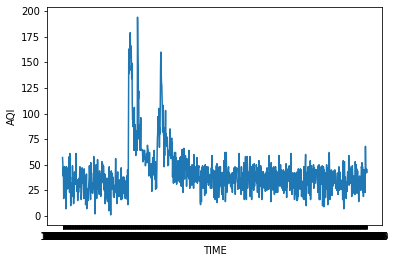

In [ ]:
#Graph
#Dataset 1
plt.xlabel("TIME")
plt.ylabel("AQI")
pd.plotting.register_matplotlib_converters()
plt.plot(index)

# #Dataset 2
# plt.xlabel("DATE")
# plt.ylabel("Minimum Temperature")
# plt.plot(index1)

In [ ]:
index

,AQI
DATE,
16:42:53,57
16:42:54,51
16:42:55,39
16:42:56,47
16:42:57,17
...,...
17:01:05,48
17:01:06,44
17:01:07,46


             AQI
DATE            
16:42:53     NaN
16:42:54     NaN
16:42:55     NaN
16:42:56     NaN
16:42:57     NaN
...          ...
17:01:05  35.675
17:01:06  35.975
17:01:07  36.400
17:01:08  36.925
17:01:09  36.725

[1044 rows x 1 columns]                 AQI
DATE               
16:42:53        NaN
16:42:54        NaN
16:42:55        NaN
16:42:56        NaN
16:42:57        NaN
...             ...
17:01:05  11.620908
17:01:06  11.678355
17:01:07  11.727242
17:01:08  11.487758
17:01:09  11.268262

[1044 rows x 1 columns]


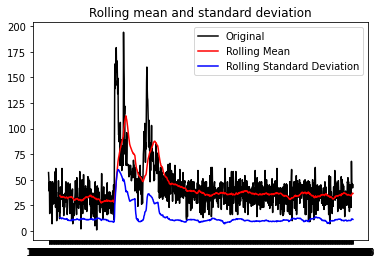

In [ ]:
#Stats
#Dataset 1
rmean=index.rolling(window=40).mean()
rstd=index.rolling(window=40).std()
print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

# #Dataset 2
# rmean1=index1.rolling(window=12).mean()
# rstd1=index1.rolling(window=12).std()
# print(rmean1,rstd1)
# orig=plt.plot(index1 , color='black',label='Original')
# mean= plt.plot(rmean1 , color='red',label='Rolling Mean')
# std=plt.plot(rstd1,color='blue',label = 'Rolling Standard Deviation')
# plt.legend(loc='best')
# plt.title("Rolling mean and standard deviation")
# plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(index["AQI"], autolag = 'AIC')

dfoutput =pd.Series(dftest[0:4],index=["test statics",'p-value',"Flag used","NO of observation used"])
for key,value in dftest[4].items():
  dfoutput["Critical value (%s)"%key] = value

print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


test statics                -5.323401
p-value                      0.000005
Flag used                    4.000000
NO of observation used    1039.000000
Critical value (1%)         -3.436659
Critical value (5%)         -2.864326
Critical value (10%)        -2.568253
dtype: float64


In [ ]:
df = index.copy()

In [ ]:
df

,AQI
DATE,
16:42:53,57
16:42:54,51
16:42:55,39
16:42:56,47
16:42:57,17
...,...
17:01:05,48
17:01:06,44
17:01:07,46


In [ ]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
# df = pd.read_csv('train.csv', nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013 




In [ ]:
data=pd.read_csv(io.BytesIO(uploaded['final.csv']))

In [ ]:
data

,DATE,AQI
0,16:42:53,57
1,16:42:54,51
2,16:42:55,39
3,16:42:56,47
4,16:42:57,17
...,...,...
1039,17:01:05,48
1040,17:01:06,44
1041,17:01:07,46
1042,17:01:08,42


In [ ]:
#Aggregating the dataset at daily level
# data['Timestamp'] = pd.to_datetime(data["DATE"],format="%H:%M:%S").dt.time
data['Timestamp'] = pd.to_datetime(data["DATE"],format="%H:%M:%S")

In [ ]:
data

,DATE,AQI,Timestamp
0,16:42:53,57,1900-01-01 16:42:53
1,16:42:54,51,1900-01-01 16:42:54
2,16:42:55,39,1900-01-01 16:42:55
3,16:42:56,47,1900-01-01 16:42:56
4,16:42:57,17,1900-01-01 16:42:57
...,...,...,...
1039,17:01:05,48,1900-01-01 17:01:05
1040,17:01:06,44,1900-01-01 17:01:06
1041,17:01:07,46,1900-01-01 17:01:07
1042,17:01:08,42,1900-01-01 17:01:08


In [ ]:
data = data.set_index(['Timestamp'])

In [ ]:
data.index.dtype

dtype('<M8[ns]')

In [ ]:
data

,DATE,AQI
Timestamp,,
1900-01-01 16:42:53,16:42:53,57
1900-01-01 16:42:54,16:42:54,51
1900-01-01 16:42:55,16:42:55,39
1900-01-01 16:42:56,16:42:56,47
1900-01-01 16:42:57,16:42:57,17
...,...,...
1900-01-01 17:01:05,17:01:05,48
1900-01-01 17:01:06,17:01:06,44
1900-01-01 17:01:07,17:01:07,46


In [ ]:
train=data[0:800] 
test=data[800:]

In [ ]:
data = data.resample('30S').mean()

In [ ]:
# data['Timestamp'] = pd.to_datetime(data["DATE"],format="%H:%M:%S")
train['Timestamp'] = pd.to_datetime(train["DATE"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train

,DATE,AQI,Timestamp
Timestamp,,,
1900-01-01 16:42:53,16:42:53,57,2022-04-14 16:42:53
1900-01-01 16:42:54,16:42:54,51,2022-04-14 16:42:54
1900-01-01 16:42:55,16:42:55,39,2022-04-14 16:42:55
1900-01-01 16:42:56,16:42:56,47,2022-04-14 16:42:56
1900-01-01 16:42:57,16:42:57,17,2022-04-14 16:42:57
...,...,...,...
1900-01-01 16:56:59,16:56:59,16,2022-04-14 16:56:59
1900-01-01 16:57:00,16:57:00,42,2022-04-14 16:57:00
1900-01-01 16:57:01,16:57:01,33,2022-04-14 16:57:01


In [ ]:
# train.index = train.Timestamp 
train = train.resample('30S').mean() 

In [ ]:
train

,AQI
Timestamp,
1900-01-01 16:42:30,41.428571
1900-01-01 16:43:00,34.000000
1900-01-01 16:43:30,32.566667
1900-01-01 16:44:00,29.300000
1900-01-01 16:44:30,32.866667
1900-01-01 16:45:00,32.600000
1900-01-01 16:45:30,29.033333
1900-01-01 16:46:00,28.666667
1900-01-01 16:46:30,89.388889


In [ ]:
# train['Timestamp'] = pd.to_datetime(train["DATE"])
test['Timestamp'] = pd.to_datetime(test["DATE"])
# test.index = test.Timestamp 
test = test.resample('30S').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Naive Forecast')

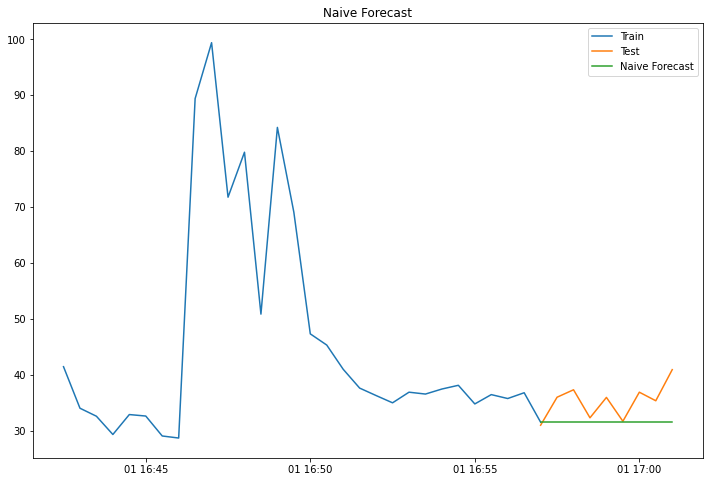

In [ ]:
dd = np.asarray(train["AQI"])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
# plt.savefig('time-series-naive-approach.png')



In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test["AQI"], y_hat["naive"]))
print('RMSE with naive approach : ', rms)

RMSE with naive approach :  4.7846534375376395


In [ ]:
resample = 30sec, 4.445110848565453
resample = 5sec , 14.267567710443606

SyntaxError: ignored